In [46]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
from sklearn.datasets import make_circles  # For generating a toy dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.metrics import classification_report  # For evaluating classification performance


In [ ]:
# Generate a toy dataset with 1000 samples
# The dataset will have two features (col1 and col2) and a binary target variable
X, Y = make_circles(n_samples=1000, factor=0.1, noise=0.1)

# Create a DataFrame from the generated data
df = pd.DataFrame(X, columns=['col1', 'col2'])

# Add the target variable to the DataFrame
df['target'] = Y

# Display the DataFrame
df

,col1,col2,target
0,0.333568,-0.089546,1
1,0.671761,-0.661202,0
2,-0.863176,0.075698,0
3,0.179183,0.042297,1
4,-0.885295,-0.057820,0
...,...,...,...
995,0.034733,0.165359,1
996,-0.166341,-0.005741,1
997,0.024510,0.041780,1
998,0.744274,-0.456656,0


<Axes: >

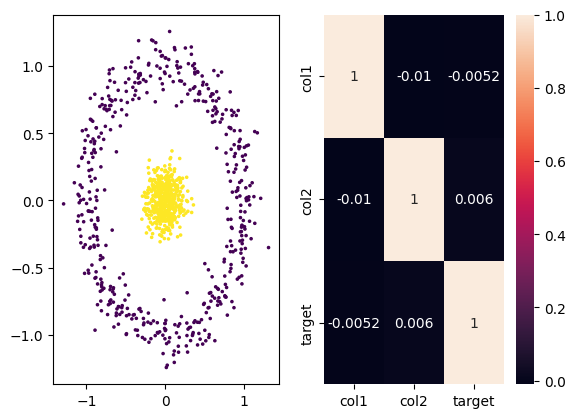

In [ ]:
# Create a subplot with 1 row and 2 columns, and set the first subplot as active
plt.subplot(1, 2, 1)
# Scatter plot of col1 vs col2, colored by the target variable
plt.scatter(df.col1, df.col2, c=df.target, marker='.', s=10)
# Create a subplot with 1 row and 2 columns, and set the second subplot as active
plt.subplot(1, 2, 2)
# Heatmap of the correlation matrix of the dataframe, with annotations
sns.heatmap(df.corr(), annot=True)

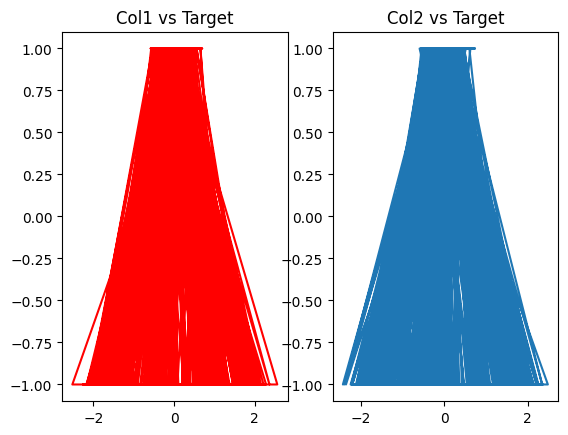

In [ ]:
# Create a subplot with 1 row and 2 columns, and set the first subplot as active
plt.subplot(1, 2, 1)
# Plot col1 against target with red color
plt.plot(df.col1, df.target, color='r')
# Set the title for the first subplot
plt.title("Col1 vs Target")

# Create a subplot with 1 row and 2 columns, and set the second subplot as active
plt.subplot(1, 2, 2)
# Plot col2 against target with default color
plt.plot(df.col2, df.target)
# Set the title for the second subplot
plt.title("Col2 vs Target")

# Display the plots
plt.show()

In [ ]:
# Loop through each column in the DataFrame
for i in df.columns:
    # Apply StandardScaler to each column and transform the data
    df[i] = StandardScaler().fit_transform(df[[i]])

In [ ]:
# Split the DataFrame into training and testing sets
# The features are all columns except 'target'
# The target variable is the 'target' column
# 80% of the data will be used for testing, and 20% for training
# The random_state parameter ensures reproducibility of the split
xtrain, xtest, ytrain, ytest = train_test_split(
    df.drop(['target'], axis=1), 
    df['target'], test_size=0.8, random_state=42
)

In [ ]:
# Initialize the Support Vector Classifier with a radial basis function (rbf) kernel
model = SVC(kernel='rbf')

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Predict the target values for the test set
ypredtest = model.predict(xtest)

# Predict the target values for the training set
ypredtrain = model.predict(xtrain)

In [ ]:
# Print the classification report for the training set
# This report includes metrics such as precision, recall, f1-score, and support
# It helps to evaluate the performance of the model on the training data
print(classification_report(ytrain, ypredtrain))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Print the classification report for the test set
# This report includes metrics such as precision, recall, f1-score, and support
# It helps to evaluate the performance of the model on the test data
print(classification_report(ytest, ypredtest))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       398
         1.0       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

